In [1]:
import sys

!{sys.executable} -m pip install quandl

import quandl

You should consider upgrading via the 'C:\Users\shrey\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
quandl.ApiConfig.api_key = "cXH79XvS4LUdycK5DQau"

In [4]:
df = quandl.get("EOD/AAPL")

In [5]:
df

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2013-09-03,493.10,500.600,487.350,488.580,11854600.0,0.0,1.0,15.619650,15.857223,15.437510,15.476472,331928800.0
2013-09-04,499.56,502.240,496.280,498.691,12322600.0,0.0,1.0,15.824280,15.909173,15.720381,15.796753,345032800.0
2013-09-05,500.25,500.680,493.640,495.270,8441700.0,0.0,1.0,15.846136,15.859757,15.636755,15.688388,236367600.0
2013-09-06,498.44,499.380,489.950,498.220,12840200.0,0.0,1.0,15.788802,15.818578,15.519869,15.781833,359525600.0
2013-09-09,505.00,507.920,503.480,506.170,12167400.0,0.0,1.0,15.996600,16.089095,15.948451,16.033661,340687200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-21,174.17,176.020,174.100,175.010,20949896.0,0.0,1.0,41.899570,42.344619,41.882730,42.101646,83799584.0
2017-12-22,174.68,175.424,174.500,175.010,16349444.0,0.0,1.0,42.022259,42.201241,41.978957,42.101646,65397776.0
2017-12-26,170.80,171.470,169.679,170.570,33185536.0,0.0,1.0,41.088858,41.250038,40.819183,41.033528,132742144.0


In [6]:
df['HL_PCT']=(df["Adj_High"]-df["Adj_Low"])/(df["Adj_Close"]*100)
df['PCT_change']=(df["Adj_Close"]-df["Adj_Open"])/(df["Adj_Open"]*100)

In [7]:
df.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,HL_PCT,PCT_change
Date,,,,,,,,,,,,,,
2013-09-03,493.10,500.60,487.35,488.580,11854600.0,0.0,1.0,15.619650,15.857223,15.437510,15.476472,331928800.0,0.000271,-0.000092
2013-09-04,499.56,502.24,496.28,498.691,12322600.0,0.0,1.0,15.824280,15.909173,15.720381,15.796753,345032800.0,0.000120,-0.000017
2013-09-05,500.25,500.68,493.64,495.270,8441700.0,0.0,1.0,15.846136,15.859757,15.636755,15.688388,236367600.0,0.000142,-0.000100
2013-09-06,498.44,499.38,489.95,498.220,12840200.0,0.0,1.0,15.788802,15.818578,15.519869,15.781833,359525600.0,0.000189,-0.000004
2013-09-09,505.00,507.92,503.48,506.170,12167400.0,0.0,1.0,15.996600,16.089095,15.948451,16.033661,340687200.0,0.000088,0.000023


In [8]:
df = df[["Adj_Open","Adj_High","Adj_Low","Adj_Close","Adj_Volume"]]

In [9]:
df.shape

(1090, 5)

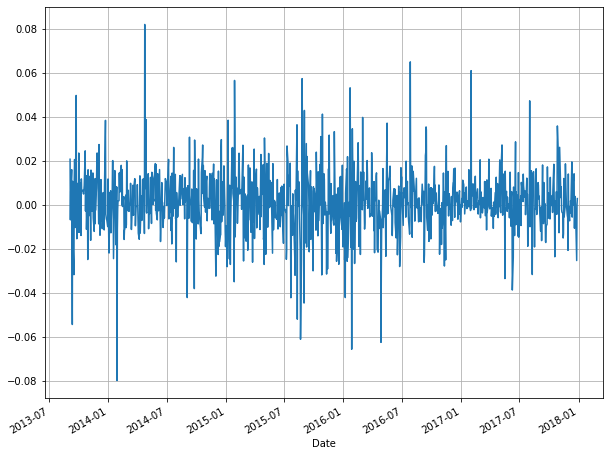

In [10]:
df['Adj_Close'].pct_change().plot(figsize=(10,8),grid=True)

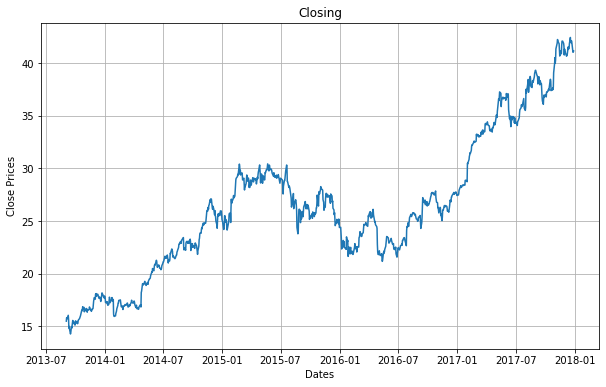

In [11]:
plt.figure(figsize = (10,6))
plt.grid(True)
plt.plot(df["Adj_Close"])
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.title('Closing')
plt.show()

In [12]:
df.corr()

,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Adj_Open,1.000000,0.999528,0.999416,0.998987,-0.549990
Adj_High,0.999528,1.000000,0.999278,0.999526,-0.544404
Adj_Low,0.999416,0.999278,1.000000,0.999558,-0.560073
Adj_Close,0.998987,0.999526,0.999558,1.000000,-0.553474
Adj_Volume,-0.549990,-0.544404,-0.560073,-0.553474,1.000000


In [13]:
df.shape

(1090, 5)

In [15]:
label = df["Adj_Close"].shift(-10)
print("Label having total null:",label.isna().sum())
print("Shape of Label ",label.shape)
print(df["Adj_Close"])
print(label)
label.dropna(inplace= True)
y=np.array(label)
X = (df[["Adj_Open","Adj_High","Adj_Low","Adj_Volume"]])
X_lately = X[-10:]
X = X[:-10]
X_train , X_test,y_train, y_test = train_test_split(X,y,test_size=0.3 , random_state =41)
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X_train)
X_train = norm.transform(X_train)
X_test = norm.transform(X_test)
X_lately = norm.transform(X_lately)

Label having total null: 10
Shape of Label  (1090,)
Date
2013-09-03    15.476472
2013-09-04    15.796753
2013-09-05    15.688388
2013-09-06    15.781833
2013-09-09    16.033661
                ...    
2017-12-21    42.101646
2017-12-22    42.101646
2017-12-26    41.033528
2017-12-27    41.040745
2017-12-28    41.156217
Name: Adj_Close, Length: 1090, dtype: float64
Date
2013-09-03    14.422914
2013-09-04    14.719406
2013-09-05    14.960780
2013-09-06    14.805882
2013-09-09    15.541726
                ...    
2017-12-21          NaN
2017-12-22          NaN
2017-12-26          NaN
2017-12-27          NaN
2017-12-28          NaN
Name: Adj_Close, Length: 1090, dtype: float64


In [16]:
reg =LinearRegression()
reg.fit(X_train , y_train)
score = reg.score(X_test , y_test)
print("Estimated Intercept Coeff : ",reg.intercept_)
print("Number of coeff : ",len(reg.coef_))

Estimated Intercept Coeff :  14.98345004997064
Number of coeff :  4


In [17]:
coefdf = pd.DataFrame(zip(X.columns , reg.coef_),columns=['features','estimatedCoefficient'])

In [18]:
coefdf

,features,estimatedCoefficient
0,Adj_Open,-23.808840
1,Adj_High,28.638717
2,Adj_Low,22.392937
3,Adj_Volume,-0.484332


In [19]:
forcast = []
forecast = reg.predict(X_lately)
y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test , y_pred)
print("MSE:", mse)
print("Linear Reg Score:",score)
print(forecast)

MSE: 1.5358548122003446
Linear Reg Score: 0.9651995497041045
[41.61978856 41.7462645  42.73040992 42.10348543 41.98820628 42.45086336
 42.28436869 41.12791455 41.12793764 41.36872491]
